# Trabajo académico final - Herramientas de la IA
### Autores:
    - Lincango Simbaña Betsy Belén
    - Lincango Simbaña Dennis David
### Wiki: [Análisis del mercado de productos electrónicos con apoyo de la IA](https://github.com/dennis-lincango/HIA-Project/wiki/Inteligencia-Artificial)
### Repositorio: [HIA-Project](https://github.com/dennis-lincango/HIA-Project)

## Importación de librerías

In [11]:
import pandas as pd
from config.config import CONNECTION_STRING

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from bokeh.palettes import Category20, Category20c
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, output_file, show
from bokeh.models import LabelSet
from bokeh.io import output_notebook

import pygwalker as pyg
import json

from IPython.display import Image, display

## Información general del CSV

In [12]:
df_csv = pd.read_csv("../data/ElectronicsProductsPricingData.csv")
df_csv.head()

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN


In [13]:
print(f"N° Filas: {df_csv.shape[0]}")
print(f"N° Columnas: {df_csv.shape[1]}")
print(f"Columnas: {df_csv.columns.tolist()}")

N° Filas: 7249
N° Columnas: 31
Columnas: ['id', 'prices.amountMax', 'prices.amountMin', 'prices.availability', 'prices.condition', 'prices.currency', 'prices.dateSeen', 'prices.isSale', 'prices.merchant', 'prices.shipping', 'prices.sourceURLs', 'asins', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'imageURLs', 'keys', 'manufacturer', 'manufacturerNumber', 'name', 'primaryCategories', 'sourceURLs', 'upc', 'weight', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30']


## Información general del SQL

In [14]:
df_sql = pd.read_sql_query("SELECT * FROM ElectronicsDatabaseData", CONNECTION_STRING)
df_sql.head()

,id,prices.amountMax,prices.amountMin,prices.availability,prices.isSale,prices.merchant,prices.shipping,brand,categories,name,weight
0,1,993.19,572.66,in stock,True,Petersen Group,10 USD,Samsung,smartphone,Multi-tiered background structure,2.8 kg
1,2,704.75,438.82,out of stock,False,"Brown, Lucas and Moore",9 USD,Lenovo,televisor,Visionary maximized artificial intelligence,3.49 kg
2,3,1012.30,579.50,limited,True,Robinson Inc,0 USD,LG,smartwatch,Centralized coherent access,1.29 kg
3,4,354.31,241.03,in stock,False,"Buck, Wright and Steele",21 USD,Apple,laptop,Multi-lateral multi-state hardware,3.03 kg
4,5,230.71,161.56,in stock,False,"Jones, Banks and Robertson",15 USD,HP,tablet,Compatible context-sensitive ability,3.33 kg


In [15]:
print(f"N° Filas: {df_sql.shape[0]}")
print(f"N° Columnas: {df_sql.shape[1]}")
print(f"Columnas: {df_sql.columns.tolist()}")

N° Filas: 2751
N° Columnas: 11
Columnas: ['id', 'prices.amountMax', 'prices.amountMin', 'prices.availability', 'prices.isSale', 'prices.merchant', 'prices.shipping', 'brand', 'categories', 'name', 'weight']


## Unión entre el CSV y el SQL
### En base a la columna brand se realiza la unión

In [16]:
df_union = pd.concat([df_csv, df_sql], axis=0)
# df_union.to_csv("../data/ElectronicsFinal.csv", index=False)
df_union.head()

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN


In [17]:
print(f"N° Filas: {df_union.shape[0]}")
print(f"N° Columnas: {df_union.shape[1]}")
print(f"Columnas: {df_union.columns.tolist()}")

N° Filas: 10000
N° Columnas: 31
Columnas: ['id', 'prices.amountMax', 'prices.amountMin', 'prices.availability', 'prices.condition', 'prices.currency', 'prices.dateSeen', 'prices.isSale', 'prices.merchant', 'prices.shipping', 'prices.sourceURLs', 'asins', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'imageURLs', 'keys', 'manufacturer', 'manufacturerNumber', 'name', 'primaryCategories', 'sourceURLs', 'upc', 'weight', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30']


## Visualizaciones a través de Matplotlib
### Matplotlib - Top 20 de productos menos vendidos por marca


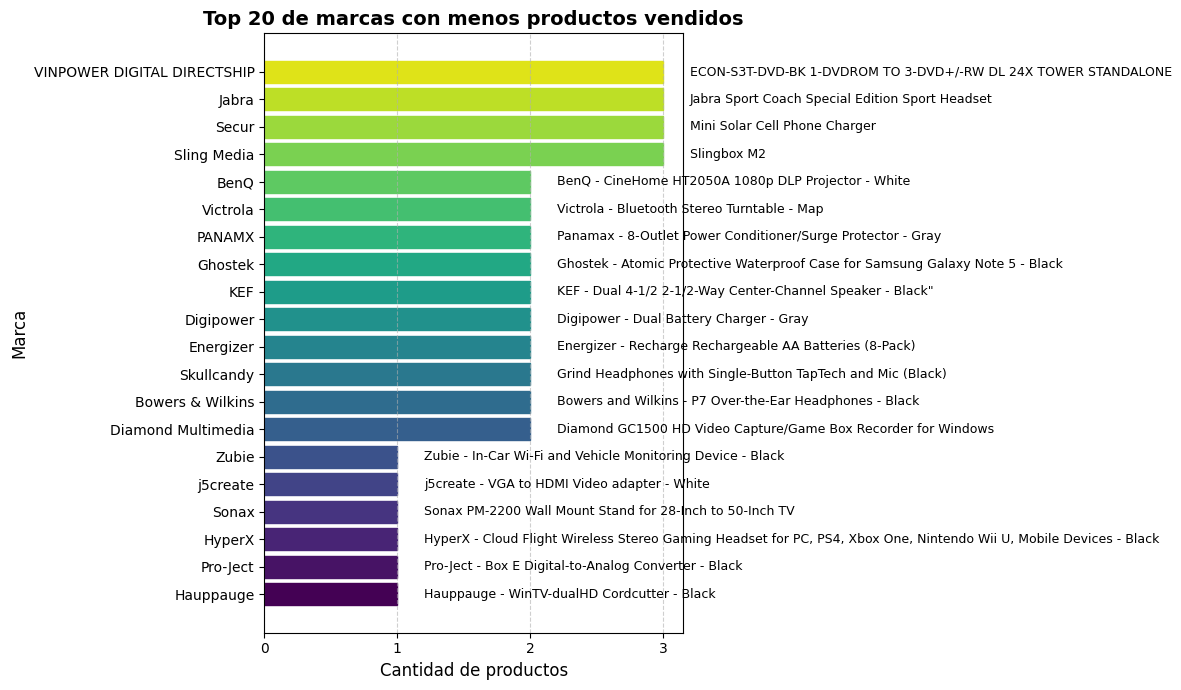

In [18]:
conteo = df_union.groupby('brand')['id'].count().sort_values(ascending=True).head(20)

productos = df_union[df_union['brand'].isin(conteo.index)] \
    .sort_values(by='brand') \
    .drop_duplicates(subset='brand') \
    .set_index('brand')['name']

plt.figure(figsize=(12, 7), facecolor='white')
bars = plt.barh(conteo.index, conteo.values)

for i, bar in enumerate(bars):
    bar.set_color(plt.cm.viridis(i / len(bars)))

plt.title("Top 20 de marcas con menos productos vendidos", fontsize=14, fontweight='bold')
plt.xlabel("Cantidad de productos", fontsize=12)
plt.ylabel("Marca", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

for i, bar in enumerate(bars):
    marca = conteo.index[i]
    width = bar.get_width()
    nombre_producto = productos.get(marca, "Sin nombre")
    plt.text(width + 0.2, bar.get_y() + bar.get_height() / 2,
             f'{nombre_producto}',
             va='center', fontsize=9, color='black')

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

### Bokeh - Marcas con mayor cantidad de productos en stock

In [19]:
df_filtered = df_union[
    (df_union["brand"].notna()) &
    (df_union["prices.availability"] == "in stock")
    ]

brand_counts = (
    df_filtered
    .groupby("brand")
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)

num_bars = len(brand_counts)
palette = Category20[20] if num_bars <= 20 else Category20c[20] * (num_bars // 20 + 1)

brand_counts["color"] = palette[:num_bars]

source = ColumnDataSource(brand_counts)

p = figure(
    x_range=brand_counts["brand"],
    height=450,
    width=800,
    title=f"Marcas con mayor cantidad de productos en stock",
    toolbar_location=None,
    tools=""
)

p.vbar(x="brand", top="count", width=0.8, color="color", source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1.2

labels = LabelSet(
    x="brand", y="count", text="count", level="glyph",
    x_offset=0, y_offset=-10, source=source,
    text_font_size="10pt", text_color="white",
    text_align="center", text_baseline="middle"
)
p.add_layout(labels)

output_notebook()
# output_file("brands_with_stock.html")
show(p)

Loading BokehJS ...

### PygWalker - Productos más vendidos y su respectivo precio máximo de venta

In [20]:
df_filtered = df_union[df_union['prices.amountMax'].notna()]
# pyg.walk(df_filtered)

with open("../config/visual_exported.json", "r", encoding="utf-8") as file:
    vis_spec = json.load(file)

pyg.walk(df_union, spec=vis_spec)

Box(children=(HTML(value='\n<div id="ifr-pyg-00063601e45f9600EUORpTmPkXrba0QL" style="height: auto">\n    <hea…